## Machine Learning Exercise (Credit-default problem)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [30]:
dataset = pd.read_csv('credit-default.csv')

In [31]:
print(dataset.shape)
print(dataset.dtypes)
print(dataset.isna().sum())
dataset.head()

(1000, 21)
checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object
checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age         

checking_balance  months_loan_duration credit_history    purpose  amount  \
0           < 0 DM                     6       critical   radio/tv    1169   
1       1 - 200 DM                    48         repaid   radio/tv    5951   
2          unknown                    12       critical  education    2096   
3           < 0 DM                    42         repaid  furniture    7882   
4           < 0 DM                    24        delayed  car (new)    4870   

  savings_balance employment_length  installment_rate personal_status  \
0         unknown           > 7 yrs                 4     single male   
1        < 100 DM         1 - 4 yrs                 2          female   
2        < 100 DM         4 - 7 yrs                 2     single male   
3        < 100 DM         4 - 7 yrs                 2     single male   
4        < 100 DM         1 - 4 yrs                 3     single male   

  other_debtors         ...                          property age  \
0          none         ...                       real estate  67   
1          none         ...                       real estate  22   
2          none         ...                       real estate  49   
3     guarantor         ...          building society savings  45   
4          none         ...                      unknown/none  53   

   installment_plan   housing existing_credits  default  dependents  \
0              none       own                2        1           1   
1              none       own                1        2           1   
2              none       own                1        1           2   
3              none  for free                1        1           2   
4              none  for free                2        2           2   

   telephone foreign_worker                 job  
0        yes            yes    skilled employee  
1       none            yes    skilled employee  
2       none            yes  unskilled resident  
3       none            yes    skilled employee  
4       none            yes    skilled employee  

[5 rows x 21 columns]

In [33]:
## Changing the non default identification from 2 to 0
dataset['default'] = dataset['default'].apply(lambda x: 1 if x == 1 else 0)
print(dataset['default'].value_counts())

1    700
0    300
Name: default, dtype: int64


In [34]:
## Checking all the categorical values
for i in dataset.columns:
    if(dataset[i].dtypes == 'object'):
        print(dataset[i].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64
radio/tv               280
car (new)              234
furniture              181
car (used)             103
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 yrs     339
> 7 yrs       253
4 - 7 yrs     174
0 - 1 yrs     172
unemployed     62
Name: employment_length, dtype: int64
single male      548
female           310
married male      92
divorced male     50
Name: personal_status, dtype: int64
none            907

In [104]:
cat_col = []
cont_col = []
target_col =['default']

def column_type(data, cat_col, cont_col):
    for i in range(len(data.columns)):
        if(i == data.columns.get_loc(target_col[0])):
            continue
        elif(data.dtypes[i] == 'object'):
            cat_col.append(data.columns[i])
        elif(data.dtypes[i] in ['int64','float', 'uint64', 'uint8']) :
            if(len(data[data.columns[i]].unique()) <= 4):
                cat_col.append(data.columns[i])
            else:
                cont_col.append(data.columns[i])

column_type(dataset, cat_col, cont_col)

print('categorical columns: ',cat_col)
print('continuous columns: ',cont_col)
print('Target column: ',target_col)
print(len(cat_col) + len(cont_col) + len(target_col))

categorical columns:  ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'installment_rate', 'personal_status', 'other_debtors', 'residence_history', 'property', 'installment_plan', 'housing', 'existing_credits', 'dependents', 'telephone', 'foreign_worker', 'job']
continuous columns:  ['months_loan_duration', 'amount', 'age']
Target column:  ['default']
21


In [79]:
## Checking relationship between categorical variables & the target variable
for i in cat_col:
    print(dataset.groupby([i,target_col[0]])[i].count()/dataset.shape[0]*100)

## Checking relationship between continuous variables & the target variable
for i in cont_col:
    print(dataset.groupby([target_col[0]])[i].mean())

default
0    24.860000
1    19.207143
Name: months_loan_duration, dtype: float64
default
0    3938.126667
1    2985.457143
Name: amount, dtype: float64
default
0    33.963333
1    36.224286
Name: age, dtype: float64


In [94]:
## Get dummies values for variables having object datatype
dataset_new = pd.get_dummies(dataset)
print(dataset_new.shape)
print(dataset_new.dtypes[8])

(1000, 62)
uint8


In [207]:
cat_col_new = []
cont_col_new = []

column_type(dataset_new, cat_col_new, cont_col_new)

print('categorical columns: ',cat_col_new)
print('\n')
print('continuous columns: ',cont_col_new)
print('\n')
print('Target column: ',target_col)
print('\n')
print(len(cat_col_new) + len(cont_col_new) + len(target_col))

categorical columns:  ['installment_rate', 'residence_history', 'existing_credits', 'dependents', 'checking_balance_1 - 200 DM', 'checking_balance_< 0 DM', 'checking_balance_> 200 DM', 'checking_balance_unknown', 'credit_history_critical', 'credit_history_delayed', 'credit_history_fully repaid', 'credit_history_fully repaid this bank', 'credit_history_repaid', 'purpose_business', 'purpose_car (new)', 'purpose_car (used)', 'purpose_domestic appliances', 'purpose_education', 'purpose_furniture', 'purpose_others', 'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining', 'savings_balance_101 - 500 DM', 'savings_balance_501 - 1000 DM', 'savings_balance_< 100 DM', 'savings_balance_> 1000 DM', 'savings_balance_unknown', 'employment_length_0 - 1 yrs', 'employment_length_1 - 4 yrs', 'employment_length_4 - 7 yrs', 'employment_length_> 7 yrs', 'employment_length_unemployed', 'personal_status_divorced male', 'personal_status_female', 'personal_status_married male', 'personal_status_single male

In [111]:
## Split the data into train & test
from sklearn.cross_validation import train_test_split
train, test = train_test_split(dataset_new,
                               test_size = 0.25,
                               random_state = 0,
                               stratify = dataset_new['default']
                              )

print(train.shape)
print(test.shape)

(750, 62)
(250, 62)


## Gini impurity calculation

In [212]:
def gini_impurity(data,cat_col,cont_col):
    
    gini_impurity_values = {}
    
    for i in data.columns:
        
        N = data.shape[0]
        
        if(i in cat_col):
            left_sample = data[data[i] == 0]
            right_sample = data[data[i] == 1]
            
            nl = left_sample.shape[0]
            nr = right_sample.shape[0]
            
            p0_left = data[(data[i] == 0) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 0)]
            p1_left = data[(data[i] == 0) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 1)]
            
            p0_right = data[(data[i] == 1) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 0)]
            p1_right = data[(data[i] == 1) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 1)]
            
            ## Gini impurity = 1- P(0)^2 - P(1)^2
            
            gi_left = 1 - np.square(p0_left.shape[0]/nl) - np.square(p1_left.shape[0]/nl)
            gi_right = 1 - np.square(p0_right.shape[0]/nr) - np.square(p1_right.shape[0]/nr)
            
            gi_parent = (nl/N)*gi_left + (nr/N)*gi_right
            
            gini_impurity_values[i] = gi_parent
            
        elif(i in cont_col):
            
            cut = np.mean(data[i])
            
            left_sample = data[data[i] <= cut]
            right_sample = data[data[i] > cut]
            
            nl = left_sample.shape[0]
            nr = right_sample.shape[0]
            
            p0_left = data[(data[i] <= cut) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 0)]
            p1_left = data[(data[i] > cut) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 1)]
            
            p0_right = data[(data[i] <= cut) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 0)]
            p1_right = data[(data[i] > cut) & (data[data.columns[data.columns.get_loc(target_col[0])]] == 1)]
            
            ## Gini impurity = 1- P(0)^2 - P(1)^2
            
            gi_left = 1 - np.square(p0_left.shape[0]/nl) - np.square(p1_left.shape[0]/nl)
            gi_right = 1 - np.square(p0_right.shape[0]/nr) - np.square(p1_right.shape[0]/nr)
            
            gi_parent = (nl/N)*gi_left + (nr/N)*gi_right
            
            gini_impurity_values[i] = gi_parent
        
        else:
            continue
            
    return gini_impurity_values

    
            

In [209]:
cont_col_new.extend(['installment_rate','residence_history', 'existing_credits', 'dependents'])
cat_col_new = [i for i in cat_col_new if i not in cont_col_new]

In [214]:
## Storing all gini impurity values in a variable
gini_values = gini_impurity(train,cat_col_new, cont_col_new)

In [215]:
## Identifying independent & dependent variables
X_train = train.drop(['default'], axis = 1)
X_test = test.drop(['default'], axis = 1)

Y_train = train['default']
Y_test = test['default']

print(X_train.shape)
print(X_test.shape)

(750, 61)
(250, 61)


In [225]:
test['default'].value_counts()

1    175
0     75
Name: default, dtype: int64

## Model building

## Decision Tree

{'max_depth': 5}
accuracy:  0.74
Sensitivity:  0.9142857142857143
Specificity:  0.3333333333333333
f1_score:  0.8311688311688312


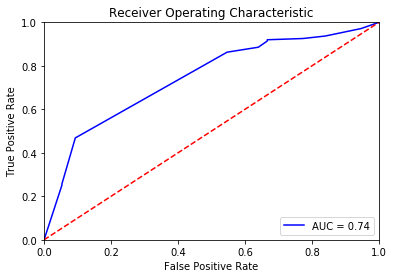

In [333]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier

##############################################################
## Hyper-parameter tuning
import random
random.seed(10)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,4,5,6,7,8,9,10]}

Classifier = DecisionTreeClassifier(random_state = 1234)
model = GridSearchCV(Classifier, param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_)
###############################################################

DT_Classifier = DecisionTreeClassifier(max_depth = model.best_params_['max_depth'], random_state = 0)
DT_Classifier.fit(X_train,Y_train)

get_class = lambda x: 1 if x > 0.5 else 0

DT_pred = pd.DataFrame(DT_Classifier.predict_proba(X_test),
                       columns = ['P0','P1'])

DT_pred['Predicted'] = DT_pred['P1'].apply(get_class)
DT_pred['Actual'] = Y_test.values

from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(DT_pred['Actual'], DT_pred['Predicted'])
DT_f1 = f1_score(DT_pred['Actual'], DT_pred['Predicted'])

tn, fp, fn, tp = cm.ravel()

## Accuracy
DT_accuracy = (tp + tn)/(tp + fp + fn +tn)
DT_Sensitivity = tp / (tp + fn)
DT_Specificity = tn / (tn + fp)

print('accuracy: ', DT_accuracy)
print('Sensitivity: ', DT_Sensitivity)
print('Specificity: ', DT_Specificity)
print('f1_score: ', DT_f1)

## ROC Curve
fpr, tpr, threshold = metrics.roc_curve(DT_pred['Actual'], DT_pred['P1'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}
accuracy:  0.744
Sensitivity:  0.9885714285714285
Specificity:  0.17333333333333334
f1_score:  0.8439024390243902


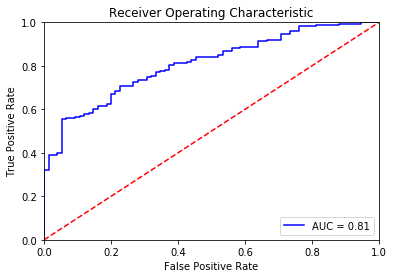

Wall time: 11min 34s


In [337]:
%%time
from sklearn.ensemble import RandomForestClassifier

##############################################################

## Hyper-parameter tuning
import random
random.seed(10)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,4,5,6],
              'max_features': ['auto','sqrt', 'log2'],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [50, 100, 200, 300, 400]
             }

Classifier = RandomForestClassifier(random_state = 0)
model = GridSearchCV(Classifier, param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_)

###############################################################

RF_Classifier = RandomForestClassifier(max_depth = model.best_params_['max_depth'],
                                       max_features = model.best_params_['max_features'],
                                       min_samples_leaf = model.best_params_['min_samples_leaf'],
                                       min_samples_split = model.best_params_['min_samples_split'],
                                       n_estimators = model.best_params_['n_estimators'],
                                       random_state = 0
                                      )
RF_Classifier.fit(X_train,Y_train)

get_class = lambda x: 1 if x > 0.5 else 0

RF_pred = pd.DataFrame(RF_Classifier.predict_proba(X_test),
                       columns = ['P0','P1'])

RF_pred['Predicted'] = RF_pred['P1'].apply(get_class)
RF_pred['Actual'] = Y_test.values

from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(RF_pred['Actual'], RF_pred['Predicted'])
RF_f1 = f1_score(RF_pred['Actual'], RF_pred['Predicted'])

tn, fp, fn, tp = cm.ravel()

## Accuracy
RF_accuracy = (tp + tn)/(tp + fp + fn +tn)
RF_Sensitivity = tp / (tp + fn)
RF_Specificity = tn / (tn + fp)

print('accuracy: ', RF_accuracy)
print('Sensitivity: ', RF_Sensitivity)
print('Specificity: ', RF_Specificity)
print('f1_score: ', RF_f1)

## ROC curve
fpr, tpr, threshold = metrics.roc_curve(RF_pred['Actual'], RF_pred['P1'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ada boost

accuracy:  0.796
Sensitivity:  0.9314285714285714
Specificity:  0.48
f1_score:  0.8647214854111406


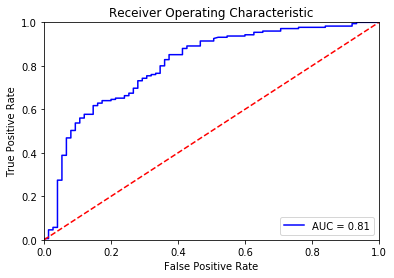

Wall time: 156 ms


In [340]:
%%time
from sklearn.ensemble import AdaBoostClassifier

# ##############################################################

# ## Hyper-parameter tuning
# import random
# random.seed(10)
# from sklearn.model_selection import GridSearchCV
# param_grid = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1],
#               'n_estimators': [50, 100, 200, 300]
#              }

# Classifier = AdaBoostClassifier(algorithm ='SAMME.R',
#                                 base_estimator = None,
#                                 random_state = 0)
# model = GridSearchCV(Classifier, param_grid, cv = 5)
# model.fit(X_train, Y_train)
# print(model.best_params_)

# ###############################################################

AB_Classifier = AdaBoostClassifier(random_state = 0)
AB_Classifier.fit(X_train,Y_train)

get_class = lambda x: 1 if x > 0.5 else 0

AB_pred = pd.DataFrame(AB_Classifier.predict_proba(X_test),
                       columns = ['P0','P1'])

AB_pred['Predicted'] = AB_pred['P1'].apply(get_class)
AB_pred['Actual'] = Y_test.values

from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(AB_pred['Actual'], AB_pred['Predicted'])
AB_f1 = f1_score(AB_pred['Actual'], AB_pred['Predicted'])

tn, fp, fn, tp = cm.ravel()

## Accuracy
AB_accuracy = (tp + tn)/(tp + fp + fn +tn)
AB_Sensitivity = tp / (tp + fn)
AB_Specificity = tn / (tn + fp)

print('accuracy: ', AB_accuracy)
print('Sensitivity: ', AB_Sensitivity)
print('Specificity: ', AB_Specificity)
print('f1_score: ', AB_f1)

## ROC curve
fpr, tpr, threshold = metrics.roc_curve(AB_pred['Actual'], AB_pred['P1'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

accuracy:  0.76
Sensitivity:  0.9028571428571428
Specificity:  0.4266666666666667
f1_score:  0.8404255319148936


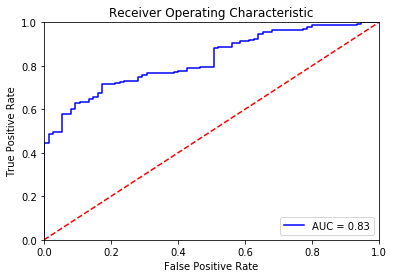

Wall time: 230 ms


In [335]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GB_Classifier = GradientBoostingClassifier(random_state = 0)
GB_Classifier.fit(X_train,Y_train)

get_class = lambda x: 1 if x > 0.5 else 0

GB_pred = pd.DataFrame(GB_Classifier.predict_proba(X_test),
                       columns = ['P0','P1'])

GB_pred['Predicted'] = GB_pred['P1'].apply(get_class)
GB_pred['Actual'] = Y_test.values

from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(GB_pred['Actual'], GB_pred['Predicted'])
GB_f1 = f1_score(GB_pred['Actual'], GB_pred['Predicted'])

tn, fp, fn, tp = cm.ravel()

## Accuracy
GB_accuracy = (tp + tn)/(tp + fp + fn +tn)
GB_Sensitivity = tp / (tp + fn)
GB_Specificity = tn / (tn + fp)

print('accuracy: ', GB_accuracy)
print('Sensitivity: ', GB_Sensitivity)
print('Specificity: ', GB_Specificity)
print('f1_score: ', GB_f1)

## ROC curve
fpr, tpr, threshold = metrics.roc_curve(GB_pred['Actual'], GB_pred['P1'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes

accuracy:  0.728
Sensitivity:  0.72
Specificity:  0.7466666666666667
f1_score:  0.7875


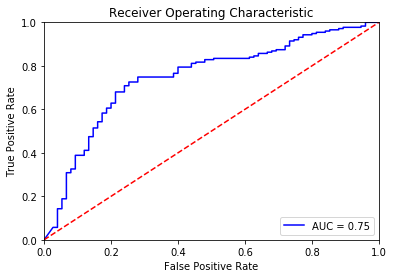

Wall time: 98.7 ms


In [336]:
%%time
from sklearn.naive_bayes import GaussianNB

NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train,Y_train)

get_class = lambda x: 1 if x > 0.5 else 0

NB_pred = pd.DataFrame(NB_Classifier.predict_proba(X_test),
                       columns = ['P0','P1'])

NB_pred['Predicted'] = NB_pred['P1'].apply(get_class)
NB_pred['Actual'] = Y_test.values

from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(NB_pred['Actual'], NB_pred['Predicted'])
NB_f1 = f1_score(NB_pred['Actual'], NB_pred['Predicted'])

tn, fp, fn, tp = cm.ravel()

## Accuracy
NB_accuracy = (tp + tn)/(tp + fp + fn +tn)
NB_Sensitivity = tp / (tp + fn)
NB_Specificity = tn / (tn + fp)

print('accuracy: ', NB_accuracy)
print('Sensitivity: ', NB_Sensitivity)
print('Specificity: ', NB_Specificity)
print('f1_score: ', NB_f1)
## ROC curve
fpr, tpr, threshold = metrics.roc_curve(NB_pred['Actual'], NB_pred['P1'])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
'''Adaboost performs the best among all the other algorithm both in terms of accuracy & Recall.
Although, recall is higher in case of Random Forest, but specificity is very poor & the model will tend to
predict more customers to default even if they are not'''